# Imdb -  Sentiment analysis
Integer Encoding

In [48]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import *
from keras.utils import pad_sequences
from tensorflow import keras
import matplotlib.pyplot as plt

In [49]:
(X_train,y_train ), (X_test,y_test) = imdb.load_data()
# this data is already integer encoded

In [50]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (25000,)
X_test shape: (25000,)
y_train shape: (25000,)
y_test shape: (25000,)


In [51]:
len(X_train[0]) , len(X_train[23])

(218, 888)

In [52]:
# this is for my lenght is not same of each sequence so we have make this all in proper range
X_train = pad_sequences(sequences=X_train,padding='post',maxlen=60)
X_test = pad_sequences(sequences=X_test,padding='post',maxlen=60)

In [53]:
len(X_train[0]) , len(X_train[23])

(60, 60)

In [54]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (25000, 60)
X_test shape: (25000, 60)


---
## Model building

In [55]:
model = Sequential()

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN
model.add(SimpleRNN(
    units=32,input_shape = (60,1), return_sequences=False # we don't want the output of the inner node (which usually we get in RNN)
))
model.add(Dense(
    units=1,activation='sigmoid'
))

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32)

Text(0.5, 1.0, 'val_loss- 0.695 and loss- 0.692')

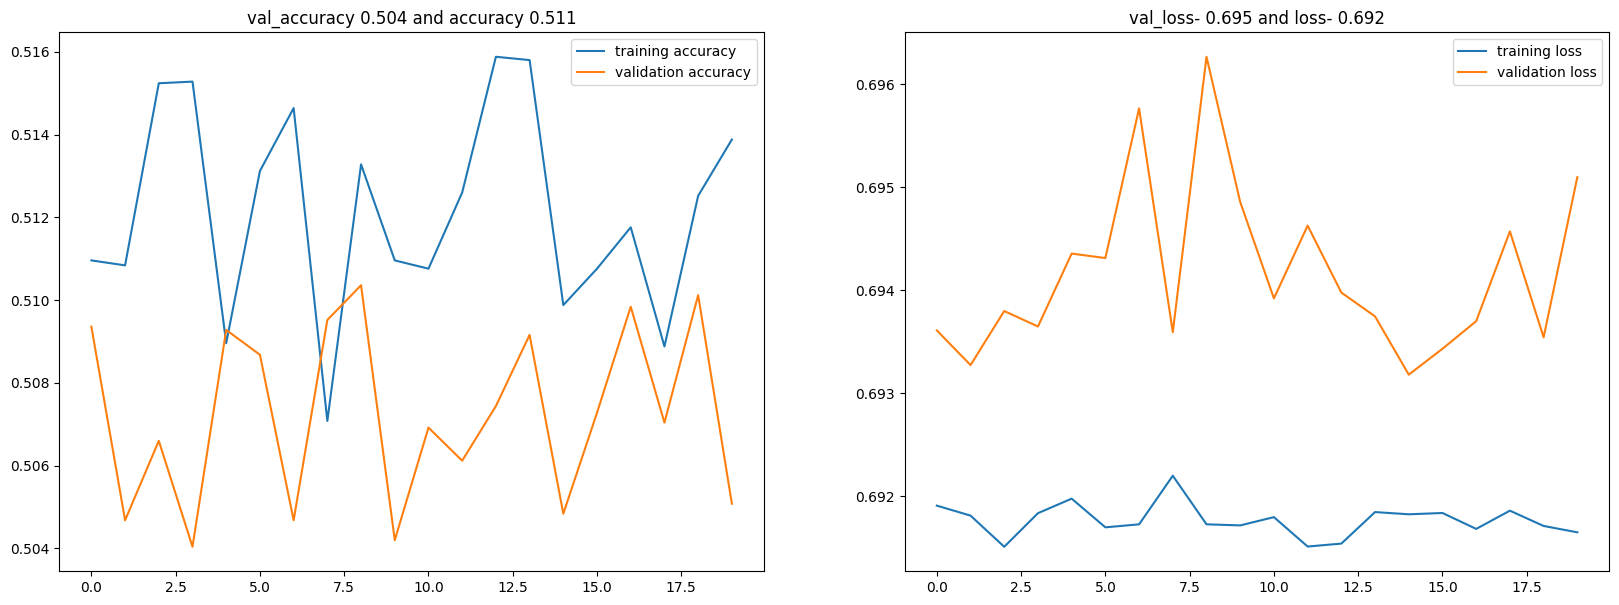

In [58]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_accuracy"][9],ndigits=3)} and accuracy {round(history.history["accuracy"][9],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_loss"][9],ndigits=3)} and loss- {round(history.history["loss"][9],ndigits=3)}')
